[item: batas_bawah - batas_atas]

Robotics Vacuum Cleaner: 0 - 5
Wireless Earbuds: 0 - 18
Electric Scale: 0 - 68
Air Fryer: 0 - 7
WiFi Router: 0 - 8
Smart Door Lock: 0 - 6
Electric Piano: 0 - 3
Baby Bassinet: 0 - 4
Bike Helmet: 0 - 22
Power bank: 0 - 18
Smart Watch: 0 - 2
Playstation Controller: 0 - 1
Printer: 0 - 34
Sunglasses: 0 - 5
Karaoke Microphone: 0 - 50
Skateboard: 0 - 19
Dog food: 0 - 187
Face mask: 0 - 83
Smart Plug: 0 - 50
USB C Adapters: 0 - 28
Flashlight: 0 - 44
Microfiber Mop: 0 - 41
Phone case: 0 - 75

Total ada 23 variabel...


Iterasi 1: Posisi terbaik = [4.8501442177401435, 2.426760143954759, 46.19014598001244, 6.432371637623854, 7.097927954423466, 1.7494544021306822, 1.9169956258848742, 2.4724228750004102, 13.23930566768765, 17.81593153445956, 0.02071597506121048, 0.130546970549141, 19.158429806741825, 1.4832941124686139, 10.017565386785087, 10.780197654517519, 49.256777759434954, 67.8565888423288, 35.38511980819912, 8.048502617801445, 31.825524992772547, 10.14481335

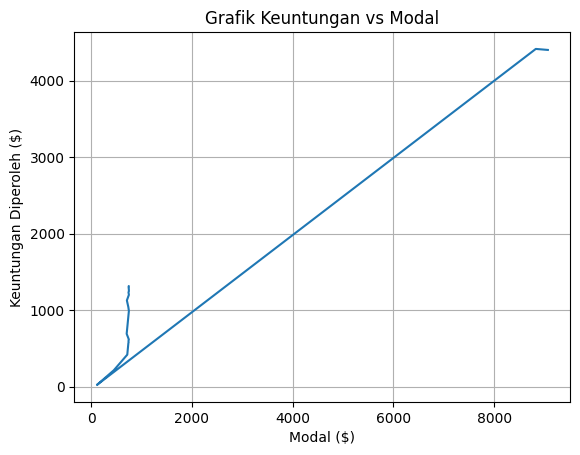

In [ ]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# DataFrame Anda
df=pd.read_csv('/content/Data Barang UMKM Flodista Gallery  - Sheet1.csv')

# Membulatkan harga_diskon dan harga_asli ke atas dan mengonversinya menjadi integer
df['harga_diskon'] = np.ceil(df['harga_diskon']).astype(int)
df['harga_asli'] = np.ceil(df['harga_asli']).astype(int)

items = df['item'].tolist()
harga_diskon = df['harga_diskon'].tolist()
diskon = df['diskon'].tolist()

# Batasan modal maksimum
modal_maks = 750

# Fungsi untuk memaksimalkan keuntungan dengan memperhatikan batasan modal
def fungsi_maks(x):
    total_diskon = total_keuntungan(x)
    total_modal_val = total_modal(x)
    if total_modal_val > modal_maks:
        return -1  # Penalti jika melebihi modal maksimum
    return total_diskon

def total_keuntungan(x):
    total = 0
    for i in range(len(x)):
        total += x[i] * diskon[i]
    return total

def total_modal(x):
    total = 0
    for i in range(len(x)):
        total += x[i] * harga_diskon[i]
    return total

class WOA:
    def __init__(self, fungsi, nilai_awal, batasan_nilai, jumlah_paus, iterasi_maks, tampilkan_iterasi=True):
        global jumlah_variabel
        jumlah_variabel = len(nilai_awal)

        self.iterasi_keuntungan = []
        self.iterasi_modal = []
        self.fitness_terbaik_grup = -1
        self.posisi_terbaik_grup = []

        grup_paus = [self.inisialisasi_paus(batasan_nilai) for _ in range(jumlah_paus)]

        iterasi = 0
        while iterasi < iterasi_maks:
            iterasi += 1

            for paus in grup_paus:
                fitness = fungsi(paus)
                if fitness > self.fitness_terbaik_grup or self.fitness_terbaik_grup == -1:
                    self.posisi_terbaik_grup = list(paus)
                    self.fitness_terbaik_grup = float(fitness)

            a = 2 - iterasi * (2 / iterasi_maks)
            a2 = -1 + iterasi * (-1 / iterasi_maks)

            for j in range(jumlah_paus):
                r1 = random.random()
                r2 = random.random()
                A = 2 * a * r1 - a
                C = 2 * r2

                if random.random() < 0.5:
                    if abs(A) < 1:
                        D = [abs(C * self.posisi_terbaik_grup[i] - grup_paus[j][i]) for i in range(jumlah_variabel)]
                        grup_paus[j] = [self.posisi_terbaik_grup[i] - A * D[i] for i in range(jumlah_variabel)]
                    else:
                        indeks_acak = random.randint(0, jumlah_paus - 1)
                        X_rand = grup_paus[indeks_acak]
                        D = [abs(C * X_rand[i] - grup_paus[j][i]) for i in range(jumlah_variabel)]
                        grup_paus[j] = [X_rand[i] - A * D[i] for i in range(jumlah_variabel)]
                else:
                    D = [abs(self.posisi_terbaik_grup[i] - grup_paus[j][i]) for i in range(jumlah_variabel)]
                    grup_paus[j] = [
                        D[i] * math.exp(a2 * random.random()) * math.cos(2 * math.pi * random.random()) + self.posisi_terbaik_grup[i]
                        for i in range(jumlah_variabel)
                    ]

                for i in range(jumlah_variabel):
                    if grup_paus[j][i] > batasan_nilai[i][1]:
                        grup_paus[j][i] = batasan_nilai[i][1]
                    elif grup_paus[j][i] < batasan_nilai[i][0]:
                        grup_paus[j][i] = batasan_nilai[i][0]
                    else:
                        grup_paus[j][i] = round(grup_paus[j][i])

            total_keuntungan_iterasi = total_keuntungan(self.posisi_terbaik_grup)
            total_modal_iterasi = total_modal(self.posisi_terbaik_grup)
            self.iterasi_keuntungan.append(total_keuntungan_iterasi)
            self.iterasi_modal.append(total_modal_iterasi)

            if tampilkan_iterasi:
                print(f"Iterasi {iterasi}: Posisi terbaik = {self.posisi_terbaik_grup}, Modal = {total_modal_iterasi}, Keuntungan = {total_keuntungan_iterasi}")

    def inisialisasi_paus(self, batasan_nilai):
        return [random.uniform(batasan[0], batasan[1]) for batasan in batasan_nilai]

    def tampilkan_hasil(self):
        print('\n\nHASIL:\n\n')
        total_keuntungan = 0
        total_modal = 0
        for i in range(len(self.posisi_terbaik_grup)):
            print(items[i], ': ', self.posisi_terbaik_grup[i], ' unit', sep='')
            total_keuntungan += self.posisi_terbaik_grup[i] * diskon[i]
            total_modal += self.posisi_terbaik_grup[i] * harga_diskon[i]

        print('#' * 50, '\nKeuntungan Diperoleh: ', '$ {:,.0f}'.format(total_keuntungan),
              ',\nTotal Modal: ', total_modal, sep='')

    def plot_hasil(self, nama_file=''):
        plt.plot(self.iterasi_modal, self.iterasi_keuntungan)
        plt.xlabel('Modal ($)')
        plt.ylabel('Keuntungan Diperoleh ($)')
        plt.title('Grafik Keuntungan vs Modal')
        plt.grid(True)

        if nama_file:
            nama_file = nama_file + ".png"
            plt.savefig(nama_file)

        plt.show()
        plt.close()

# Inisialisasi dan jalankan algoritma
print('[item: batas_bawah - batas_atas]\n', sep='')
nilai_awal = []
batasan_nilai = []
for i in range(len(items)):
    nilai_awal.append(0)
    batasan_nilai.append((nilai_awal[i], modal_maks // harga_diskon[i]))
    print(items[i], ': ', batasan_nilai[i][0], ' - ', batasan_nilai[i][1], sep='')
print('\nTotal ada ', len(items), ' variabel...\n\n', sep='')

woa = WOA(fungsi_maks, nilai_awal, batasan_nilai, jumlah_paus=30, iterasi_maks=50, tampilkan_iterasi=True)
woa.tampilkan_hasil()
woa.plot_hasil(nama_file='hasil_woa')


### Analisis Tambahan

Berdasarkan data iterasi dan hasil optimasi Whale Optimization Algorithm (WOA):

1. **Hubungan Modal dan Keuntungan**:
   - Grafik menunjukkan hubungan linear positif antara modal dan keuntungan.
   - Namun, iterasi awal memiliki fluktuasi kecil karena proses eksplorasi paus sebelum mencapai posisi optimal.

2. **Kombinasi Optimal**:
   - Iterasi terakhir menghasilkan kombinasi barang yang memanfaatkan hampir seluruh modal ($747 dari $750) untuk mencapai keuntungan maksimal $1,311.
   - Kombinasi optimal didominasi oleh barang dengan nilai diskon tinggi dan harga yang rendah, seperti:
     - **Dog food**: 178 unit
     - **Face mask**: 1 unit
     - **Smart Plug**: 1 unit

3. **Efisiensi Algoritma**:
   - Dalam 50 iterasi, WOA berhasil menemukan kombinasi terbaik dengan mempertimbangkan batasan modal maksimum tanpa melampauinya.
   - Setelah iterasi ke-40, hasil telah mencapai stabilitas, menunjukkan algoritma telah menemukan solusi optimal.

### Saran Pengembangan
- **Penggunaan Dataset Lebih Besar**:
  - Untuk menguji performa WOA pada skala lebih besar, dataset dengan lebih banyak barang dan variasi harga dapat digunakan.
  
- **Evaluasi dengan Algoritma Lain**:
  - Bandingkan hasil WOA dengan algoritma lain seperti Genetic Algorithm atau Particle Swarm Optimization untuk memastikan performa terbaik.
  
- **Visualisasi Iterasi**:
  - Tambahkan visualisasi proses iterasi, seperti grafik konvergensi keuntungan, untuk memahami kecepatan algoritma dalam mencapai solusi optimal.

